In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=r"E:\Internship_Projects\Thyroid_Disease_Detection_ML\thyroid_detection\artifact\data_ingestion\2025-04-09-17-49-53\raw_data\merged_thyroid_data.csv"

In [3]:
df= pd.read_csv(df)

In [4]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Class'],
      dtype='object')

In [5]:
#remove age value >150, that is present there in the data csv
df.loc[df['age'] > 150, 'age'] = np.nan
df.replace("?",pd.NA,inplace=True)

#remove unwanted attached symbols and numerics in target column (Class)
df["Class"] = df["Class"].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).strip())
#drop unnecessary columns
df.drop(columns=["TBG","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","TBG measured","referral source"], inplace=True)
#Convert 'Class' Column into Readable Labels
#label_mapping = {'negative': 'negative','increased binding protein': 'hyperthyroidism','decreased binding protein': 'hypothyroidism'}
#df["Class"] = df["Class"].replace(label_mapping)

In [6]:
df.to_csv("processed_data.csv", index=False)


In [7]:
df.isnull().sum()

age                            12
sex                           660
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                          1704
T3                           3510
TT4                          1104
T4U                          1782
FTI                          1770
Class                           0
dtype: int64

In [9]:
df1=pd.read_csv("processed_data.csv")

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
df1=pd.read_csv("processed_data.csv")

target_column= "Class"
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1[target_column]):
    train_set = df1.loc[train_index]
    test_set = df1.loc[test_index]

print("Train set class distribution:\n", train_set[target_column].value_counts(normalize=True))
print("\nTest set class distribution:\n", test_set[target_column].value_counts(normalize=True))

train_set.to_csv("train_data.csv", index=False)
test_set.to_csv("test_data.csv", index=False)

Train set class distribution:
 negative                     0.956383
sick                         0.010197
compensated hypothyroid      0.009155
increased binding protein    0.007369
primary hypothyroid          0.003796
hyperthyroid                 0.003722
discordant                   0.002680
underreplacement             0.002084
replacement therapy          0.001712
overreplacement              0.001340
decreased binding protein    0.000521
T toxic                      0.000447
goitre                       0.000447
secondary hypothyroid        0.000149
Name: Class, dtype: float64

Test set class distribution:
 negative                     0.956237
sick                         0.010122
compensated hypothyroid      0.009229
increased binding protein    0.007443
primary hypothyroid          0.003870
hyperthyroid                 0.003572
discordant                   0.002679
underreplacement             0.002084
replacement therapy          0.001786
overreplacement              0.00148

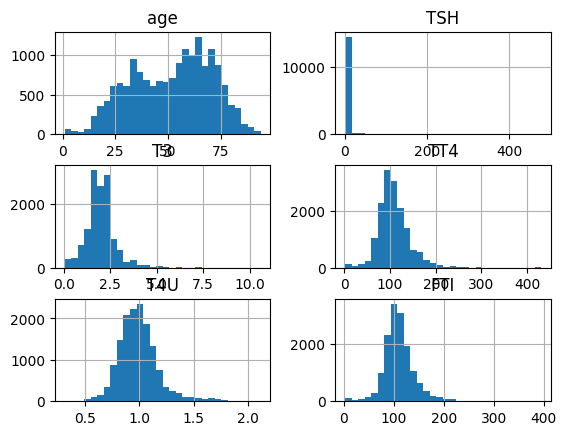

In [11]:
df.hist(bins=30)
plt.show()

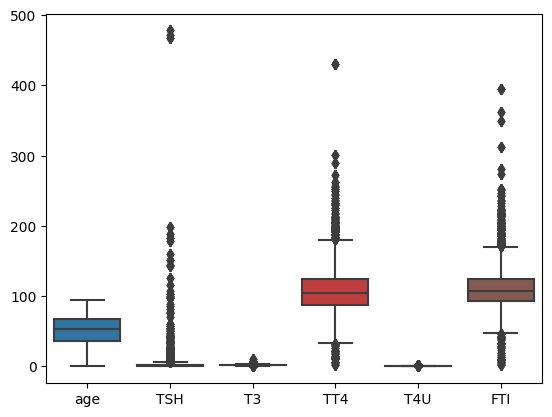

In [12]:
sns.boxplot(data=df)
plt.show()

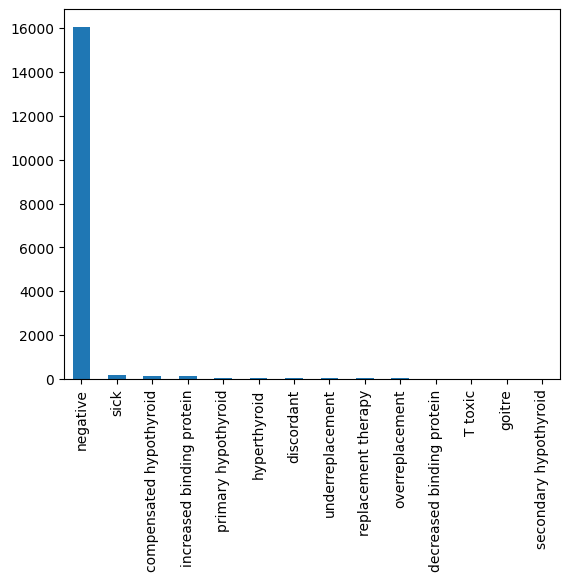

In [13]:

df["Class"].value_counts().plot(kind = "bar")
plt.show()

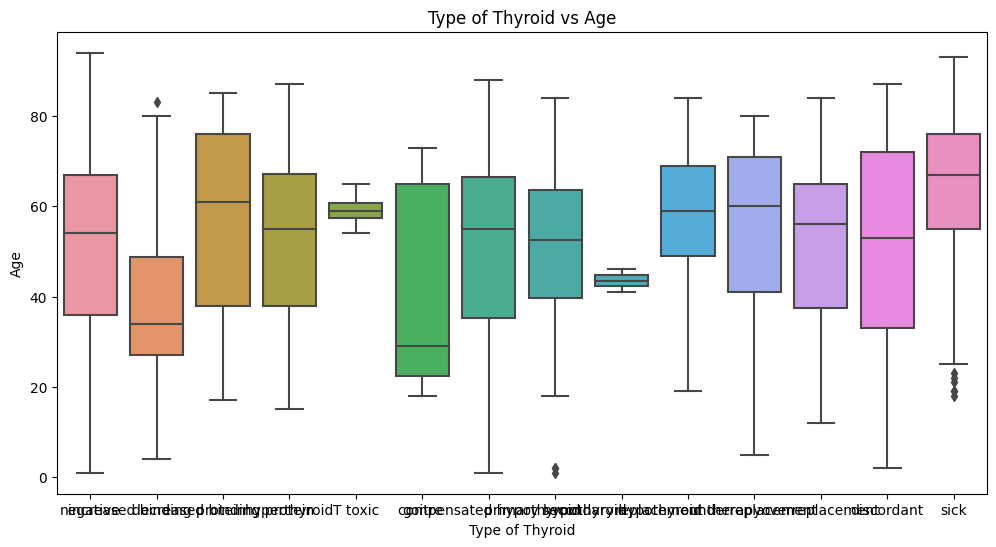

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "age", data = df)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

<AxesSubplot:>

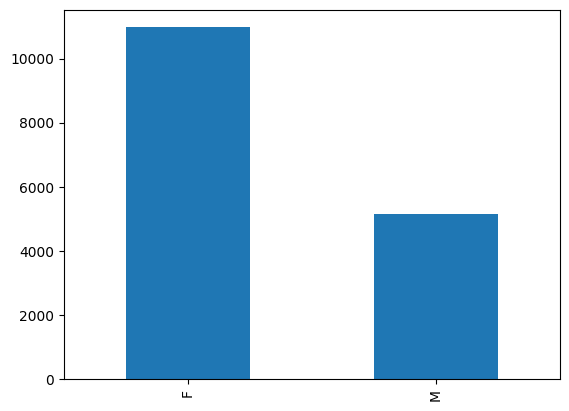

In [15]:
df["sex"].value_counts().plot(kind = "bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

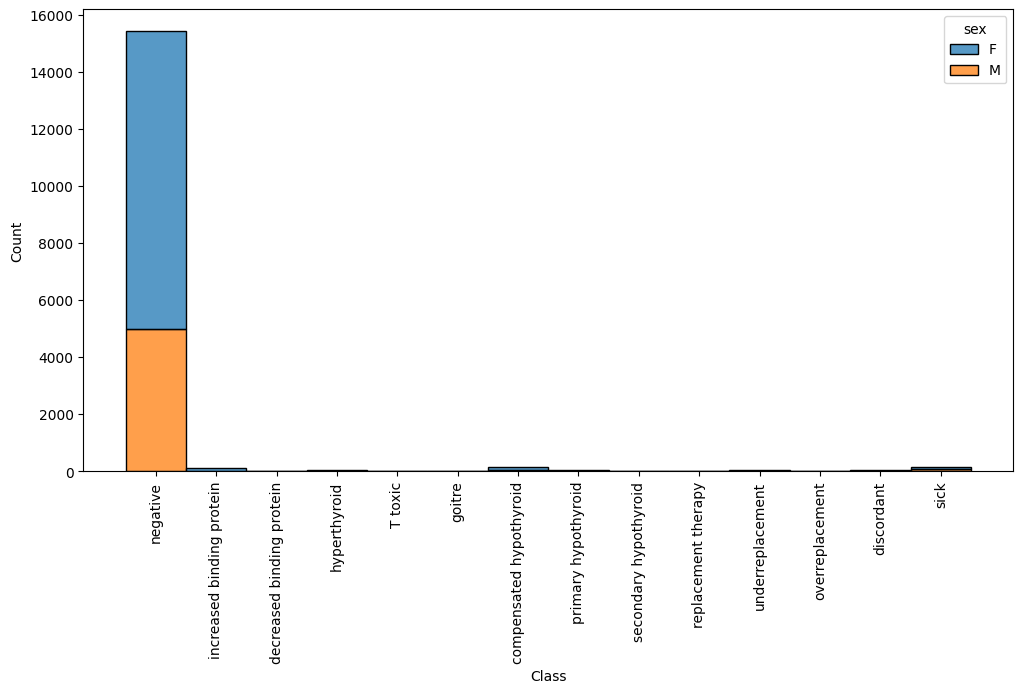

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sex", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot:>

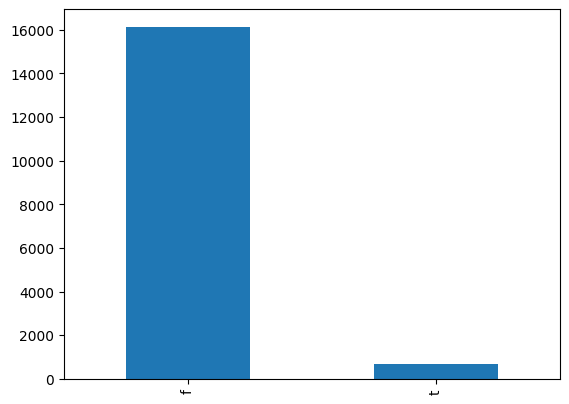

In [17]:
df["sick"].value_counts().plot(kind = "bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

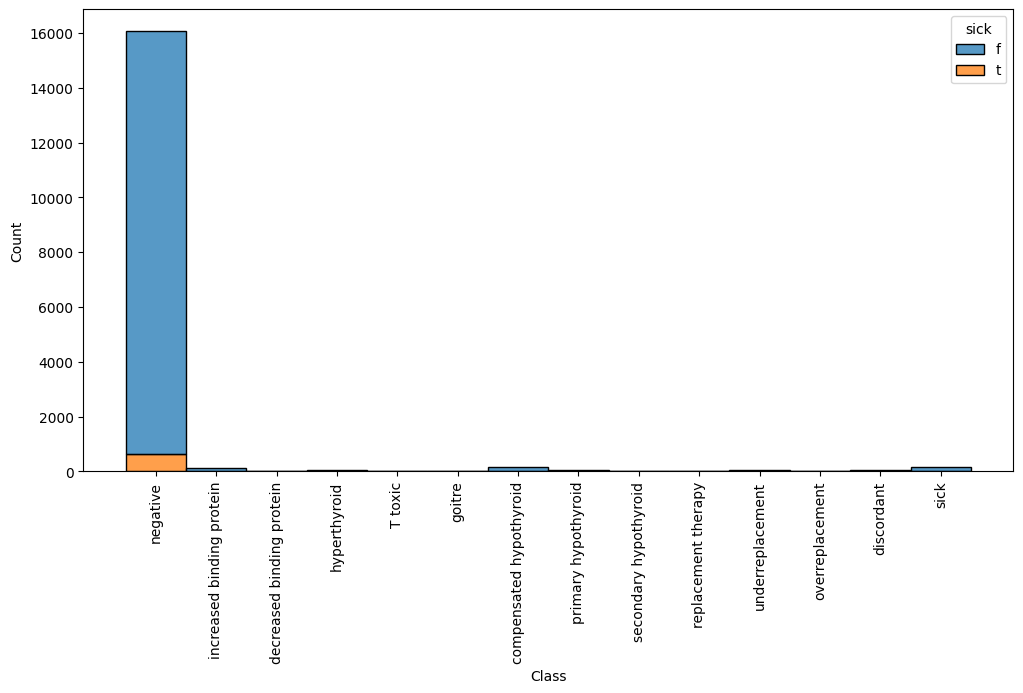

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot:>

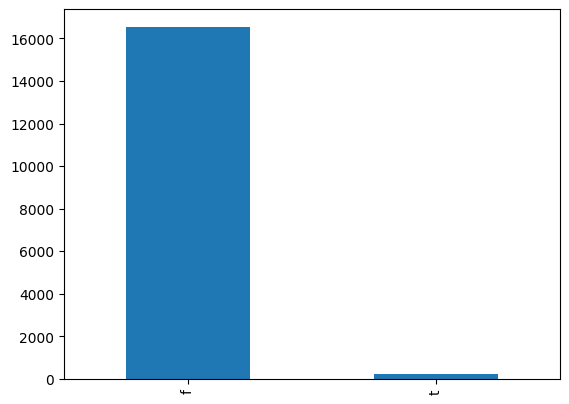

In [19]:

df["pregnant"].value_counts().plot(kind = "bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

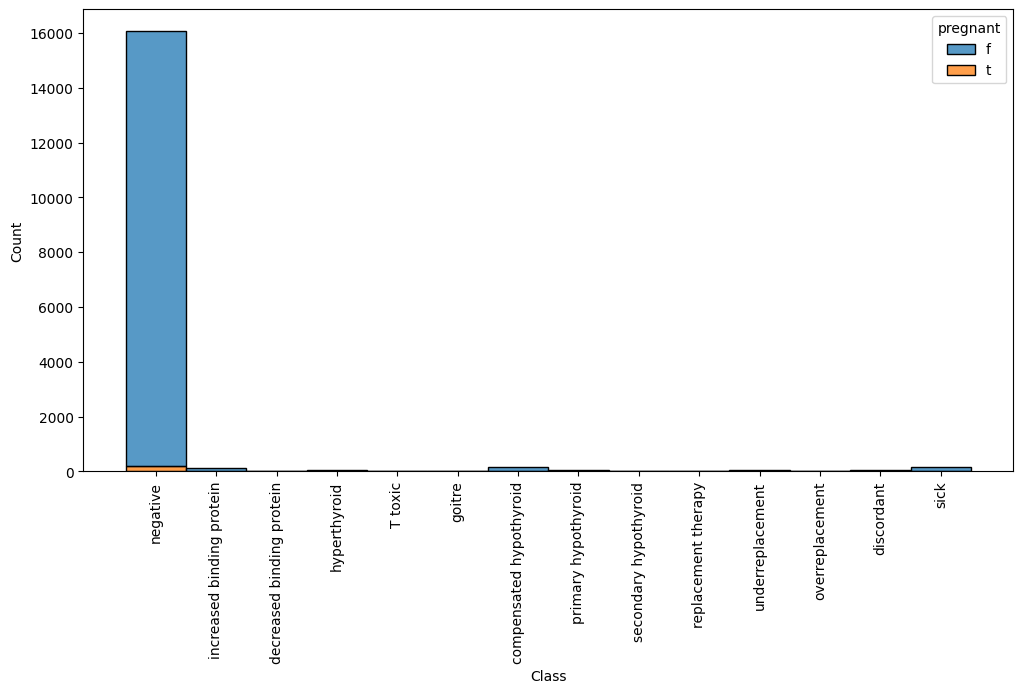

In [20]:


plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot:>

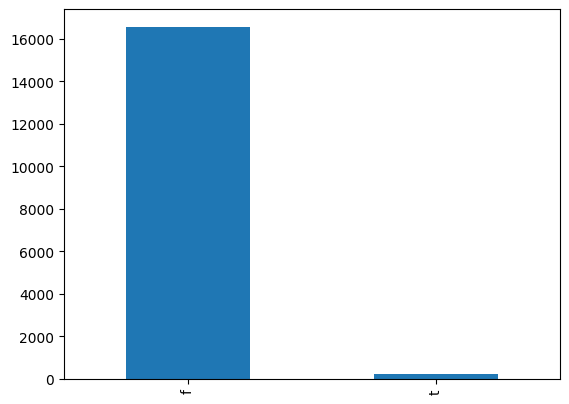

In [21]:

df["thyroid surgery"].value_counts().plot(kind = "bar")
     

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

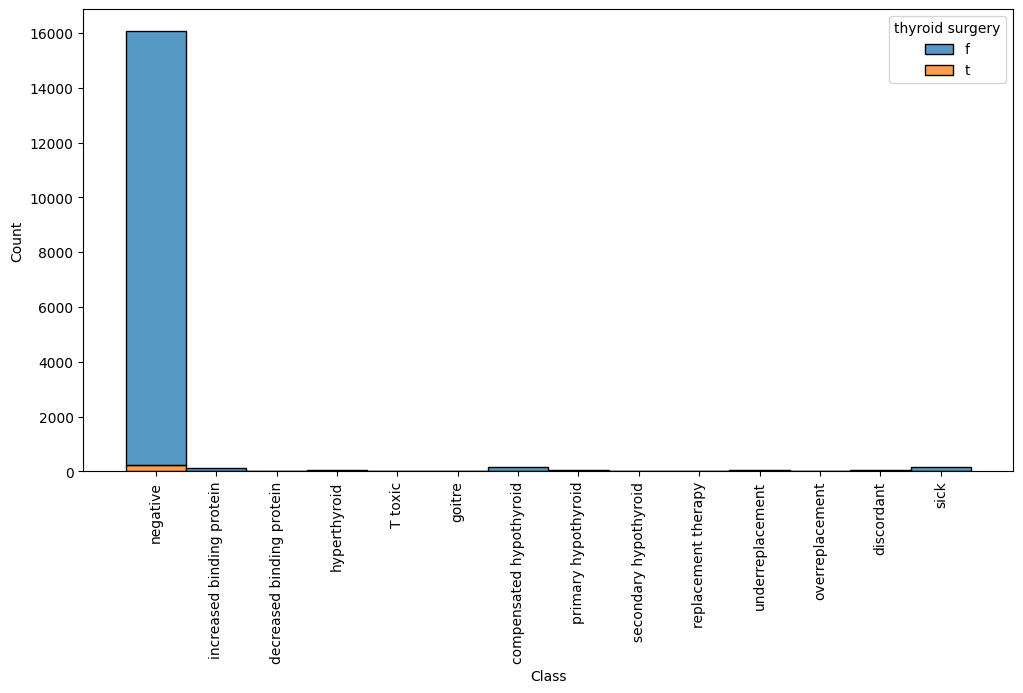

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5,x="Class", hue="thyroid surgery", data=df, stat="count",multiple="stack")
plt.xticks(rotation="vertical")